<a href="https://colab.research.google.com/github/KingsleyAsuamah/First-Test/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(7000, 30) (3000, 30) (7000, 2) (3000, 2)
Epoch 1/30
315/315 - 1s - loss: 202.4178 - accuracy: 0.0268 - recall: 0.3511 - val_loss: 0.6558 - val_accuracy: 0.0057 - val_recall: 0.7714
Epoch 2/30
315/315 - 1s - loss: 1.0210 - accuracy: 0.0093 - recall: 0.7992 - val_loss: 1.0119 - val_accuracy: 0.0229 - val_recall: 0.5800
Epoch 3/30
315/315 - 1s - loss: 0.5216 - accuracy: 0.0111 - recall: 0.9130 - val_loss: 0.1309 - val_accuracy: 0.0050 - val_recall: 0.9929
Epoch 4/30
315/315 - 1s - loss: 0.6888 - accuracy: 0.0129 - recall: 0.8840 - val_loss: 2.4921 - val_accuracy: 0.0329 - val_recall: 0.4257
Epoch 5/30
315/315 - 1s - loss: 0.6337 - accuracy: 0.0161 - recall: 0.8840 - val_loss: 0.1001 - val_accuracy: 0.0079 - val_recall: 0.9900
Epoch 6/30
315/315 - 1s - loss: 0.4842 - accuracy: 0.0167 - recall: 0.9284 - val_loss: 0.0573 - val_accuracy: 0.0193 - val_recall: 0.9971
Epoch 7/30
315/315 - 1s - loss: 0.3322 - accuracy: 0.0163 - recall: 0.9494 - val_loss: 0.2476 - val_accuracy: 0.0236 - val_recal

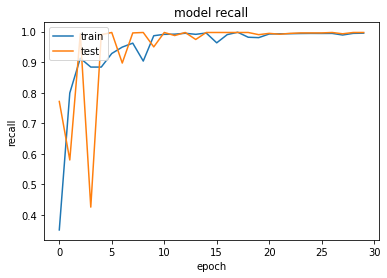

In [ ]:
#Required Libraries
import pandas as pd
import sklearn as sk
import random
import numpy as np
import matplotlib.pyplot as plt

#Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.utils import to_categorical
#from keras.utils.vis_utils import plot_model

#Required Modules
from sklearn import preprocessing
lencoder = preprocessing.LabelEncoder()
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

#print(tf.__version__)
#Load dataset
#data = pd.read_csv('creditcard.csv')
data = pd.read_csv('/content/drive/MyDrive/ProjectData/CreditCardTest10k.csv') #Data sample to be changed
#data
#data.describe()
#print(data.shape)
#data.dtypes

#shuffle(data)

#Split into Input and Output columns
x,y = data.values[:, :30], data.values[:, 30]
#y = data.values[:, :30], data.values[:, 30]

y= to_categorical(y)

#Split into Train and Test datasets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.30)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Encoding the output
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

#30 columns
#Steps
#Define the Model
#Compiling the model
#Fitting the Model
#Evaluation
#Make Predictions

#Defining the Model
model=keras.Sequential()
model.add(keras.layers.Dense(20, activation='relu', input_shape=(30,)))
model.add(keras.layers.Dense(10, activation='relu', input_shape=(20,)))
model.add(keras.layers.Dense(5, activation='relu', input_shape=(10,)))
model.add(keras.layers.Dense(2, activation='softmax'))

#Compiling the Model
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['Accuracy', 'Recall'])

#Fitting the Model
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=20,
    verbose=2,
    validation_split=0.1,
    shuffle = True)

#Model Evaluation
score = model.evaluate(x_test, y_test)

#Make Prediction
predictedValue = model.predict_classes(x_test, batch_size=20, verbose=2)

print("Predictions Below")
for val in predictedValue:
  print(val, end="")
print("  ")


#Outputing Fields in Data File
print("Evaluation Score[loss, accuracy, recall]: ", end="")
print(score)
print("test loss:", score[0])
print("test acc:", score[1])
print("test rec:", score[2])

print(history.history.keys())
history_dict = history.history

#plt.clf()
#acc_values = history_dict['accuracy'] 
#val_acc_values = history_dict['val_accuracy']
#plt.plot(30, 'accuracy', 'bo', label ='Training acc')
#plt.plot(30, 'val_accuracy', 'b', label='Validation acc')
#plt.title('Training and Validation accuracy')
#plt.xlabel('epochs')
#plt.ylabel('loss')
#plt.legend()
#plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title("model recall")
plt.ylabel("recall")
plt.xlabel("epoch")
# set_xlimit(1,4)
plt.legend(["train", "test"], loc="upper left")
plt.show()


In [ ]:
#System Appraisal
from sklearn.metrics import accuracy_score, recall_score
y_pred = to_categorical(predictedValue)
print('Accuracy score: ', accuracy_score(y_test, y_pred))


Accuracy score:  0.9993333333333333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2849
           1       1.00      0.99      0.99       151

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      0.99      1.00      3000
weighted avg       1.00      1.00      1.00      3000
 samples avg       1.00      1.00      1.00      3000



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(1), y_pred.argmax(1))

array([[2849,    0],
       [   2,  149]])